In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Problem Statement: 1
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

* **Data Dictionary for Market Segmentation**:
* **spending**: Amount spent by the customer per month (in 1000s)
* **advance_payments**: Amount paid by the customer in advance by cash (in 100s)
* **probability_of_full_payment**: Probability of payment done in full by the customer to the bank
* **current_balance**: Balance amount left in the account to make purchases (in 1000s)
* **credit_limit**: Limit of the amount in credit card (10000s)
* **min_payment_amt** : minimum paid by the customer while making payments for purchases made monthly (in 100s)
* **max_spent_in_single_shopping**: Maximum amount spent in one purchase (in 1000s)

In [2]:
import os
os.getcwd()

'C:\\Users\\msair'

In [3]:
os.chdir("C:\\Users\\msair\\Downloads")

In [4]:
data_df=pd.read_csv('bank_marketing_part1.csv')

In [5]:
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Checking basic information of the dataset


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**We have data for 210 rows with neither any null values nor any missing entries.
All columns are numerical**.

In [7]:
print("The total number of rows present in the dataset above is :  ",data_df.shape[0])
print("The total number of columns/variables present in the dataset above is :  ",data_df.shape[1])

The total number of rows present in the dataset above is :   210
The total number of columns/variables present in the dataset above is :   7


**The dimensions of data set are 210 observations and 7 variables in the data set.**

In [8]:
data_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


**Observations** -
* The above dataset contains 210 rows & 7 columns.
* All the variables/columns are of float datatype.
* There are no null and missing values in the dataset.
* The dataset does not have any duplicate values as well.

In [10]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


**we can clearly see that there are no duplicate records in the data set**.

 ### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Performing Exploratory Data Analysis


### Performing Exploratory Data Analysis


Let us define a function '**univariateAnalysis_numeric**' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [11]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data_df[column].describe(),end=' ')
    
    
    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data_df[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data_df[column],color='y')
    plt.show()

In [12]:
df_num = data_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  7


Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
----------------------------------------------------------------------------


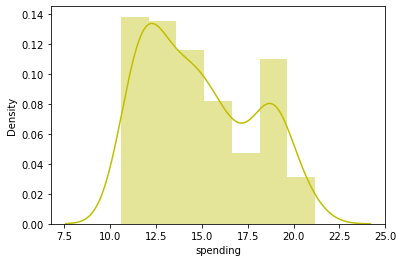

BoxPlot of spending
----------------------------------------------------------------------------


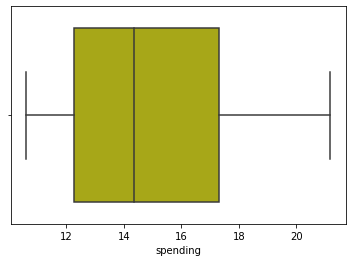

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
----------------------------------------------------------------------------


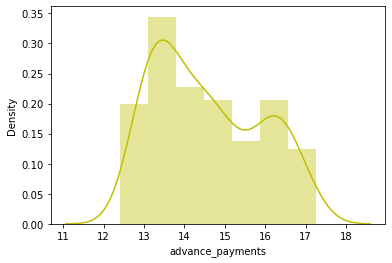

BoxPlot of advance_payments
----------------------------------------------------------------------------


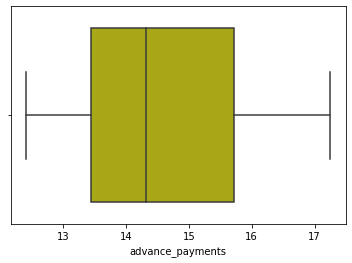

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


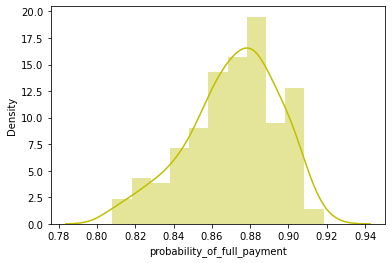

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


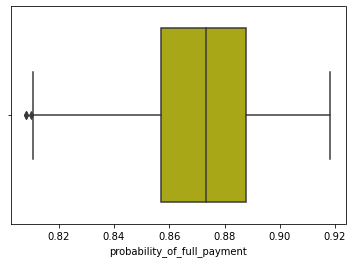

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
----------------------------------------------------------------------------


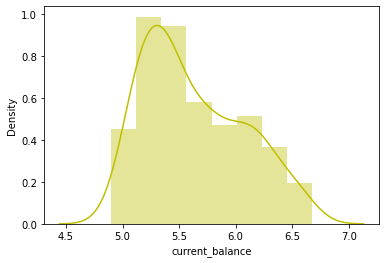

BoxPlot of current_balance
----------------------------------------------------------------------------


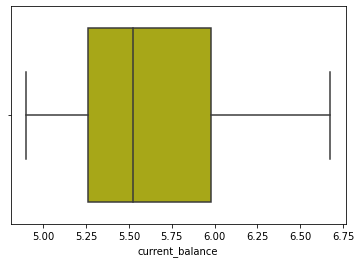

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
----------------------------------------------------------------------------


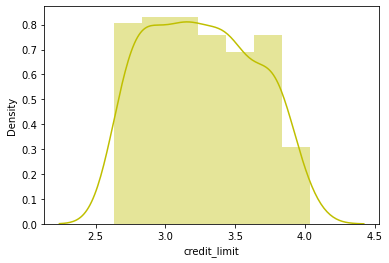

BoxPlot of credit_limit
----------------------------------------------------------------------------


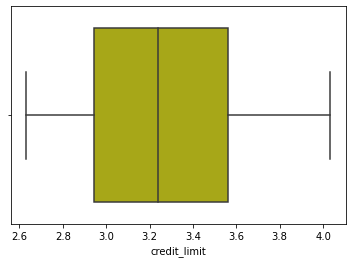

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
----------------------------------------------------------------------------


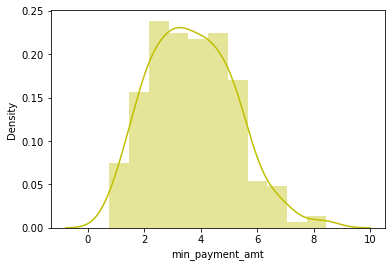

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


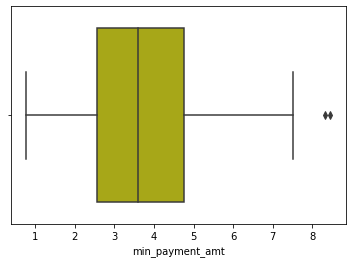

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


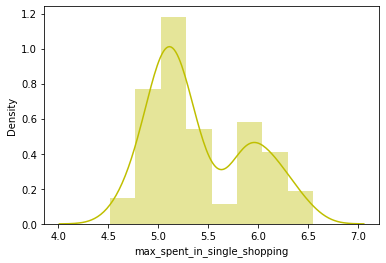

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


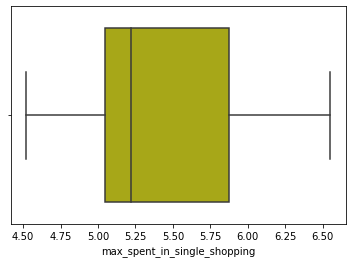

In [13]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

**Observations** -

From the plot above, we can say that,

Of all the 7 variables /columns, only variables 'probability_of_full_payment' & 'min_payment_amt' have outliers within them.
The dataset in question has a very few outliers in total, hence, we could ignore then as they are not so extreme.


In [15]:
data_df.skew(axis = 0)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

**Observations** -
From skew values above, we can say that,

* Since, the skewness value of variables/columns 'spending', 'advance_payments', 'credit_limit' and 'min_payment_amt ' is between -0.5 and +0.5, they show approximately symmetric distribution.
* Since, the skewness value of variables/columns 'probability_of_full_payment', 'current_balance' and 'max_spent_in_single_shopping' is between -1 and -0.5 or between +0.5 and +1, they show moderately skewed distribution.

### Bivariate Analysis
The following Bivariate Analysis will be performed by-

* Calculating the correlation between variable for better understanding of how variables are correlated with each other, and
* Calculating the corresponding pairplot.

In [16]:
corr = data_df.corr(method='pearson')
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


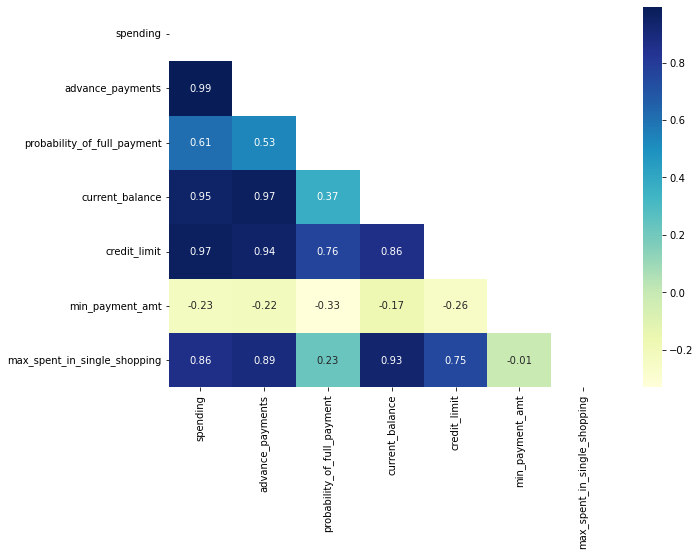

In [17]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 7))
sns.heatmap(data_df.corr(), annot=True,fmt='.2f',mask=mask,cmap='YlGnBu')
plt.show()

**There are mostly positive correlations between variables, and very few negative correlations.Overall the magnitude of correlations between the variables are very less.**

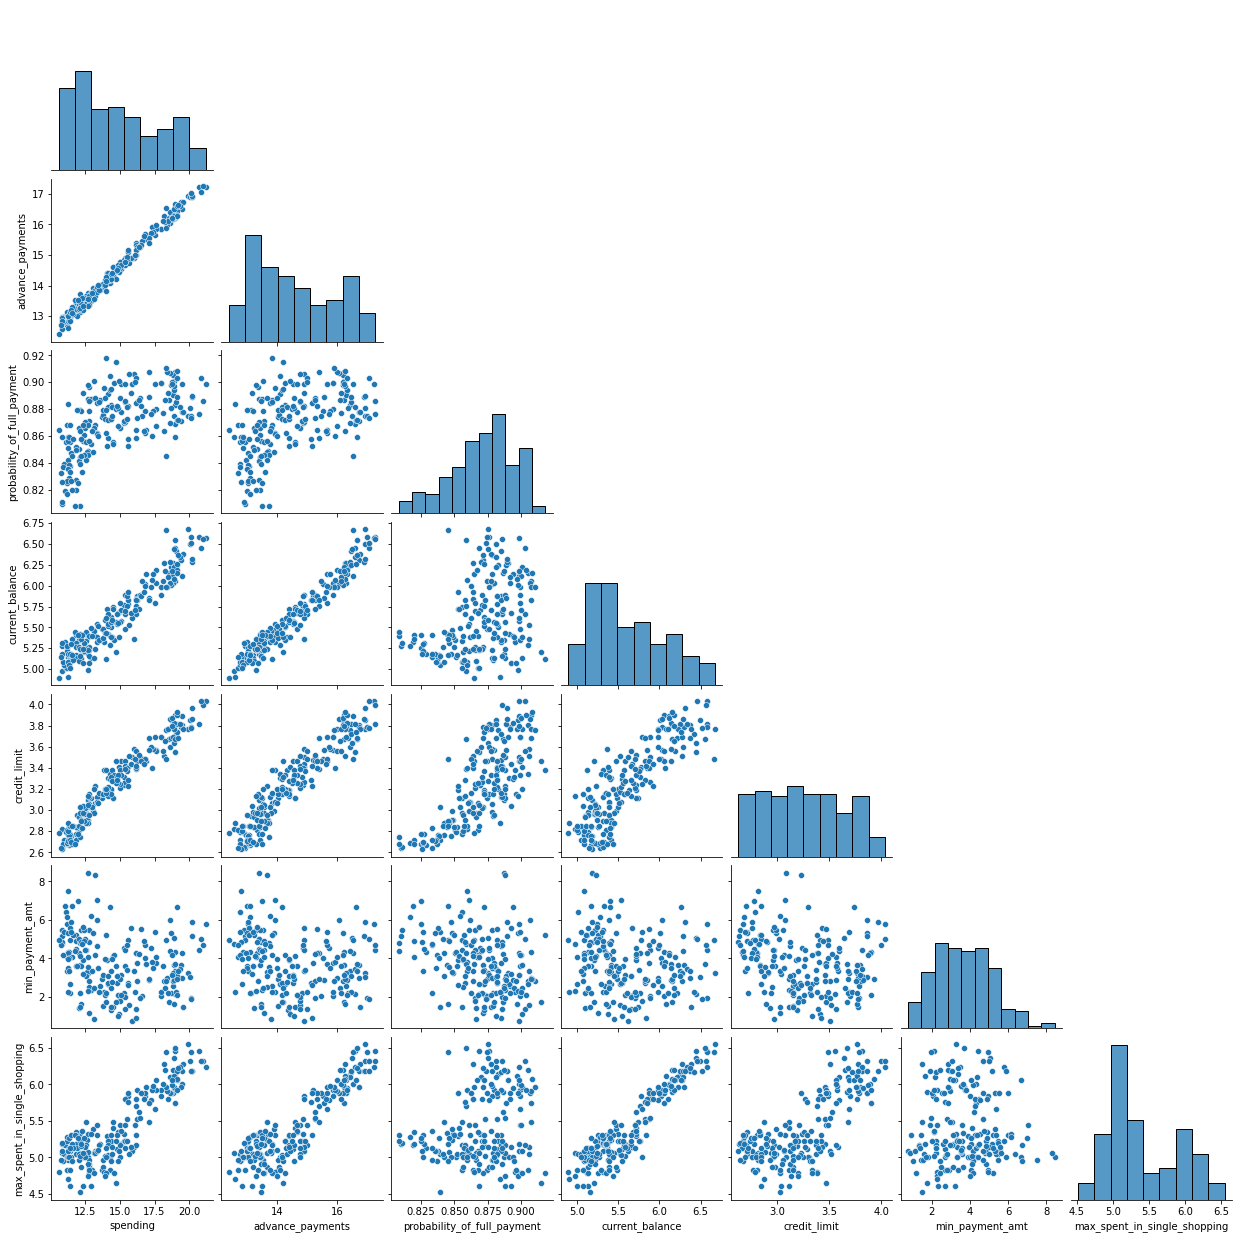

In [18]:
sns.pairplot(data_df,corner=True)
plt.show() 

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns.**

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

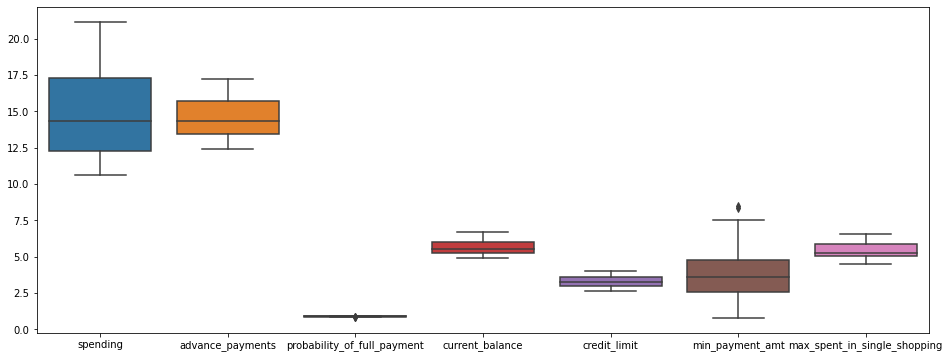

In [19]:
plt.figure(figsize=(16,6))
sns.boxplot(data = data_df)
plt.show()

In [20]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [21]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = pd.DataFrame(X.fit_transform(data_df),columns=data_df.columns)

In [22]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


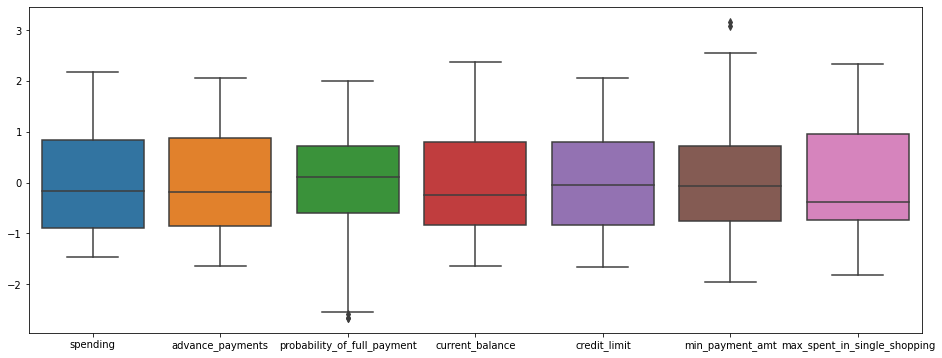

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(data = scaled_df)
plt.show()

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

**Choosing Linking Method "average"**.

In [24]:
from scipy.cluster.hierarchy import fcluster,linkage
from scipy.cluster.hierarchy import dendrogram

In [25]:
link_method = linkage(scaled_df, method = 'average')

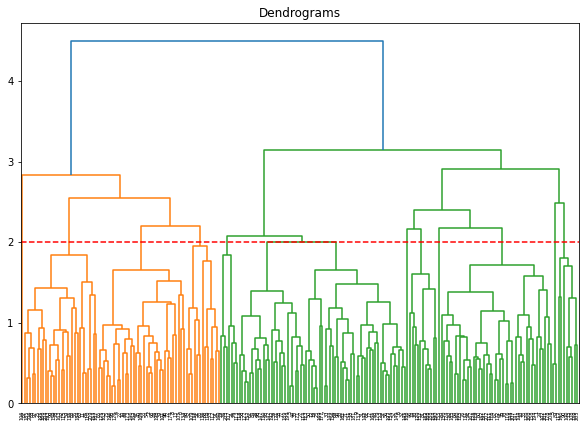

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = dendrogram(link_method)
plt.axhline(y=2, color='r', linestyle='--');

**Cutting the Dendrogram with suitable clusters**

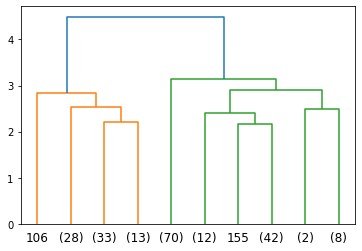

In [27]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                  
                 )

### Choosing method as "ward"


In [28]:
wardlink = linkage(scaled_df, method = 'ward')

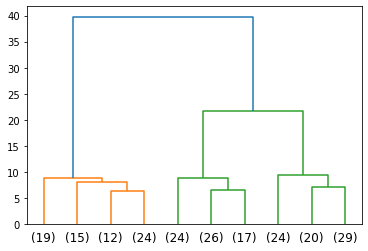

In [29]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [30]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [31]:
# Method 2

clusters1 = fcluster(wardlink, 20, criterion='distance')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [32]:
data_df['clusters'] = clusters

In [33]:
data_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1


In [34]:
data_df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

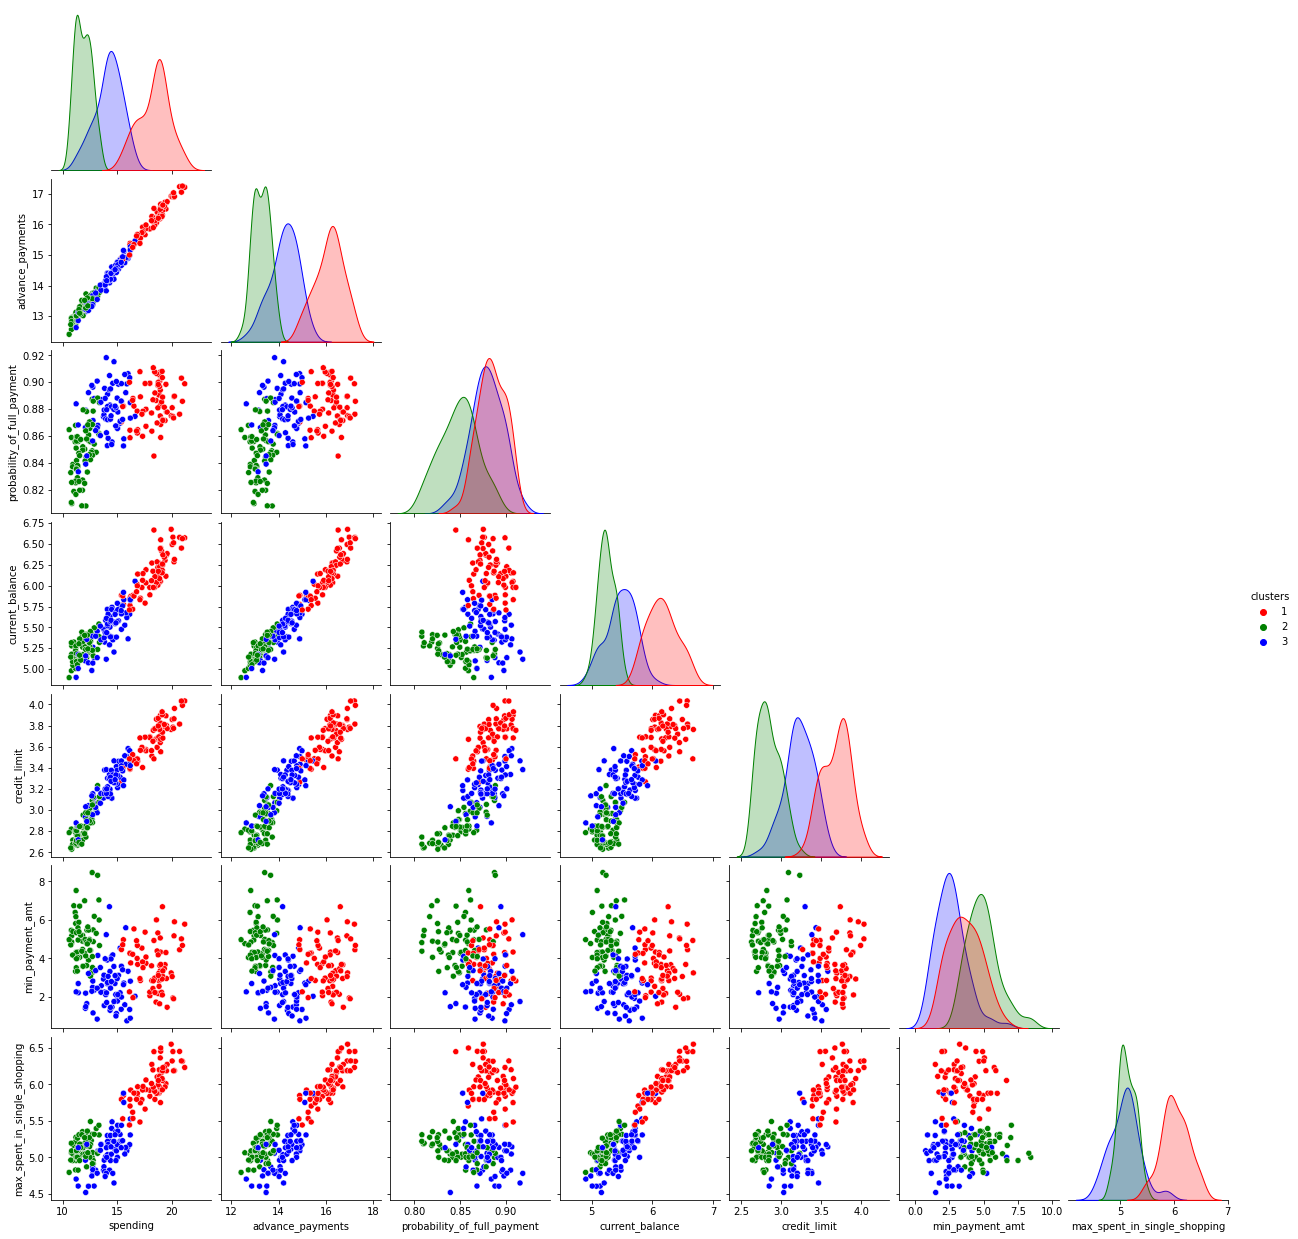

In [35]:
sns.pairplot(data_df,hue="clusters",palette=["r","g","b"],corner=True);

From the graph above, we can say that,

Cluster 1 has higher values for all variable combinations followed by cluster 3 followed by cluster 2, from which we can infer that,
* Cluster 1: Low performing customers.
* Cluster 2: High performing/new customers.
* Cluster 3: Medium performing customers.

In [36]:
data_df.to_csv('Cluster_1.csv')

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [37]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [38]:
k_means.inertia_

430.6589731513006

In [39]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [40]:
wss =[] 

In [41]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [42]:
for i in range(0,10):
    print("WSS value for ",i+1," clusters is = ",wss[i])

WSS value for  1  clusters is =  1470.0000000000002
WSS value for  2  clusters is =  659.1717544870406
WSS value for  3  clusters is =  430.6589731513006
WSS value for  4  clusters is =  371.30172127754213
WSS value for  5  clusters is =  327.1898110882491
WSS value for  6  clusters is =  289.76749301893443
WSS value for  7  clusters is =  263.1330069264385
WSS value for  8  clusters is =  241.25018863522868
WSS value for  9  clusters is =  224.9882829880238
WSS value for  10  clusters is =  208.03262610594518


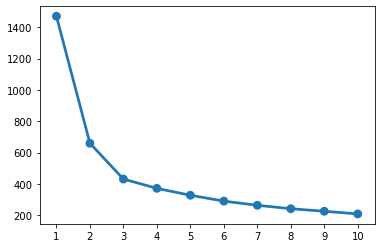

In [43]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss);

In [44]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
k_means.inertia_

430.6589731513006

**Calculating silhouette_score for multiple clusters ranging from 2 to 10**.


In [45]:
from sklearn import metrics

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [47]:
silhouette_score(scaled_df,labels,random_state=1)

0.40072705527512986

In [48]:
# Calculating silhouette_score for multiple clusters
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, km.labels_))
    

In [49]:
for i in range(0,9):
    print("The Silhouette Score/coefficient for ",i+2," clusters is = ",scores[i])

The Silhouette Score/coefficient for  2  clusters is =  0.46577247686580914
The Silhouette Score/coefficient for  3  clusters is =  0.40072705527512986
The Silhouette Score/coefficient for  4  clusters is =  0.3369008229710853
The Silhouette Score/coefficient for  5  clusters is =  0.283139370986886
The Silhouette Score/coefficient for  6  clusters is =  0.2903443931779972
The Silhouette Score/coefficient for  7  clusters is =  0.26540705308849605
The Silhouette Score/coefficient for  8  clusters is =  0.25193918824703637
The Silhouette Score/coefficient for  9  clusters is =  0.2555836756561569
The Silhouette Score/coefficient for  10  clusters is =  0.2595192218127701


In [50]:
sil_width = silhouette_samples(scaled_df,labels)

**Visualizing the Silhoutte score values**


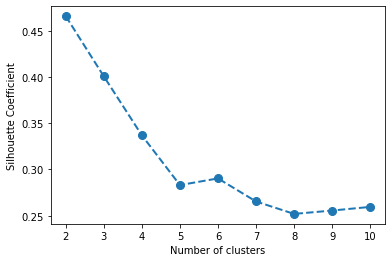

In [52]:
#plotting the sc scores
plt.plot(k_range, scores, marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [53]:
data_df["sil_width"] = sil_width
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [54]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678376

In [55]:
data_df.to_csv('K-means.csv')

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [56]:
data_df['Cluster_Kmeans']=labels
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,Cluster_Kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276,1


In [57]:
data_df.Cluster_Kmeans.value_counts().sort_index()

0    72
1    67
2    71
Name: Cluster_Kmeans, dtype: int64

In [58]:
profile = data_df
profile = profile.groupby('Cluster_Kmeans').mean()
profile['Frequency']=data_df.Cluster_Kmeans.value_counts().sort_index()
profile.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,Frequency
Cluster_Kmeans,,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71


In [59]:
profile_final = profile.T.copy()
profile_final

Cluster_Kmeans,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848253,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.742389,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
clusters,2.083333,1.029851,2.873239
sil_width,0.397473,0.468772,0.339816
Frequency,72.000000,67.000000,71.000000


**Naming of Clusters**:
Since it is observed that Cluster '1' has much higher mean spendings, also the maximum amount spent is much higher in cluster '2'. Moreover the credit limit and current balance is also higher for customers in cluster '1'. The same is observed to be lowest for Cluster '0'. Cluster '1' may be referred to as High-spenders and Cluster '0' to as Low-spenders, while cluster '2' as Medium-spenders.

In [60]:
profile_final.rename(columns={0: "Low-Spenders", 1: "High-Spenders", 2: "Medium-Spenders"}, inplace =True)
profile_final

Cluster_Kmeans,Low-Spenders,High-Spenders,Medium-Spenders
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848253,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.742389,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
clusters,2.083333,1.029851,2.873239
sil_width,0.397473,0.468772,0.339816
Frequency,72.000000,67.000000,71.000000


**====================================================================================================================**

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats
from warnings import filterwarnings
filterwarnings("ignore")

###  Problem Statement: 2
### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

**Attribute Information**:
* **Target**: Claim Status (Claimed)
* Code of tour firm (Agency_Code)
* Type of tour insurance firms (Type)
* Distribution channel of tour insurance agencies (Channel)
* Name of the tour insurance products (Product)
* Duration of the tour (Duration)
* Destination of the tour (Destination)
* Amount of sales of tour insurance policies (Sales)
* The commission received for tour insurance firm (Commission)
* Age of insured (Age)

In [62]:
os.getcwd()

'C:\\Users\\msair\\Downloads'

In [63]:
os.chdir("C:\\Users\\msair\\Downloads")

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [64]:
firm_df =  pd.read_csv("insurance_part2_data (1).csv")
firm_df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [65]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


**Observation**
* We have data for 3000 rows with neither any null values nor any missing entries.
* 10 variables present, out of which Age, Commision, Duration, Sales are numeric in nature, while rest are categorial variables.
* 9 independent variable and one target variable - Claimed.

In [66]:
firm_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [67]:
firm_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [68]:
dups2 = firm_df.duplicated()
print('Number of duplicate rows = %d' % (dups2.sum()))

firm_df[dups2]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [69]:
firm_df.drop_duplicates(inplace=True)
dups = firm_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(firm_df.shape)

Number of duplicate rows = 0
(2861, 10)


**Getting unique counts of all Nominal/Categorical Variables**.

In [70]:
for column in firm_df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',firm_df[column].nunique())
    print(firm_df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     471
C2B     913
EPX    1238
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           421
Cancellation Plan     615
Bronze Plan           645
Customised Plan      1071
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     319
ASIA        2327
Name: Destination, dtype: int64




### Performing Exploratory Data Analysis


**Univariate Analysis**

Let us define a function '**univariateAnalysis_numeric**' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [71]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(firm_df[column].describe(),end=' ')
    
    
    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(firm_df[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=firm_df[column],color='y');
    plt.show()

In [72]:
df_num = firm_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  4


In [73]:
df_cat = firm_df.select_dtypes(include = ['object'])
lstcategoricalcolumns = list(df_cat.columns.values)
print("Total Categorical Columns = ",len(lstcategoricalcolumns))

Total Categorical Columns =  6


Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
----------------------------------------------------------------------------


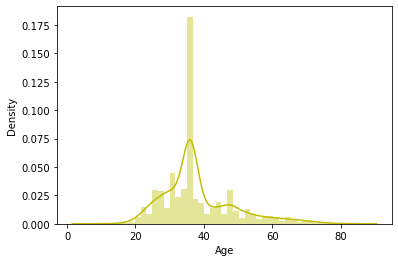

BoxPlot of Age
----------------------------------------------------------------------------


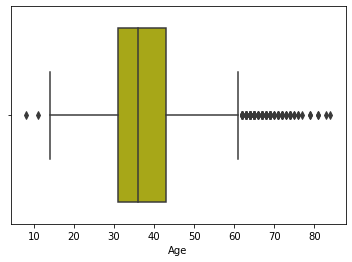

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
----------------------------------------------------------------------------


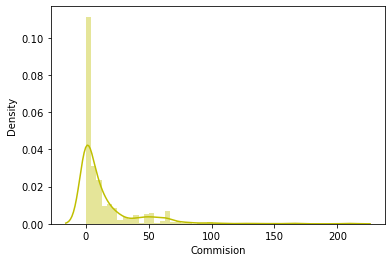

BoxPlot of Commision
----------------------------------------------------------------------------


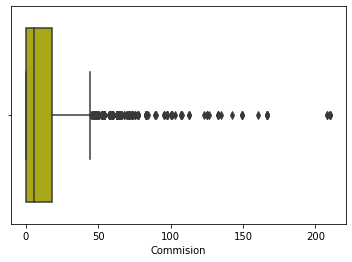

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
----------------------------------------------------------------------------


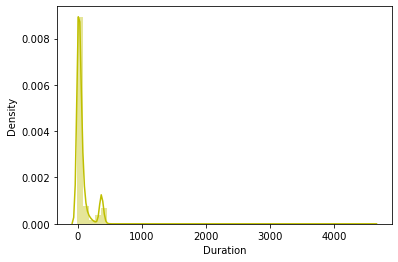

BoxPlot of Duration
----------------------------------------------------------------------------


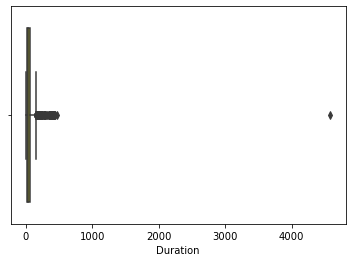

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
----------------------------------------------------------------------------


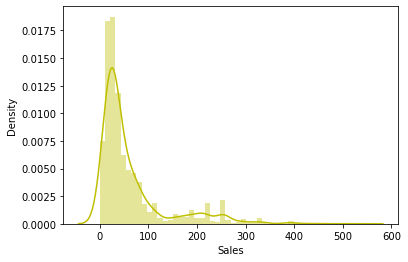

BoxPlot of Sales
----------------------------------------------------------------------------


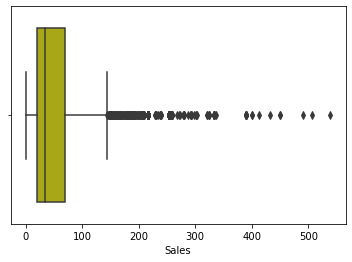

In [74]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Categorical Variables:


Percentage wise tabulation of insurance products as per insurance claim status :
Product Name  Bronze Plan  Cancellation Plan  Customised Plan  Gold Plan  \
Claimed                                                                    
No                   61.4              93.17            76.38      35.78   
Yes                  38.6               6.83            23.62      64.22   

Product Name  Silver Plan  
Claimed                    
No                  28.74  
Yes                 71.26  
Countplot of Product Name Variable according to insurance claim status :


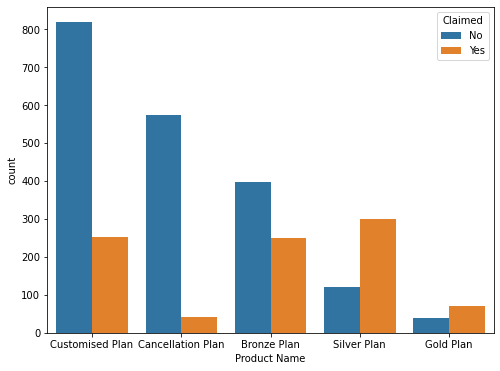

In [75]:
plt.figure(figsize =(8,6))
sns.countplot(firm_df['Product Name'], hue  = firm_df['Claimed'])
print('Percentage wise tabulation of insurance products as per insurance claim status :')
print(round(pd.crosstab(index = firm_df['Claimed'], columns = firm_df['Product Name']).apply(lambda x: x*100/x.sum()),2))
print('Countplot of Product Name Variable according to insurance claim status :')

Percentage wise tabulation of distribution channels as per insurance claim status :
Channel  Offline  Online
Claimed                 
No         63.04   68.13
Yes        36.96   31.87
Countplot of Channel Variable according to insurance claim status :


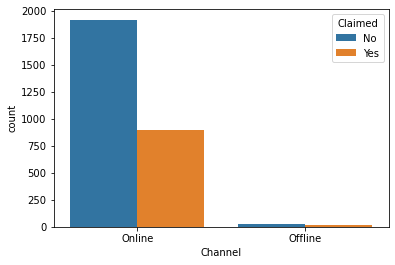

In [76]:
sns.countplot(firm_df['Channel'], hue  = firm_df['Claimed'])
print('Percentage wise tabulation of distribution channels as per insurance claim status :')
print(round(pd.crosstab(index = firm_df['Claimed'], columns = firm_df['Channel']).apply(lambda x: x*100/x.sum()),2))
print('Countplot of Channel Variable according to insurance claim status :')

Percentage wise tabulation of Type of Tour firm as per insurance claim status :
Type     Airlines  Travel Agency
Claimed                         
No          49.48          80.57
Yes         50.52          19.43
Countplot of Type Variable according to insurance claim status :


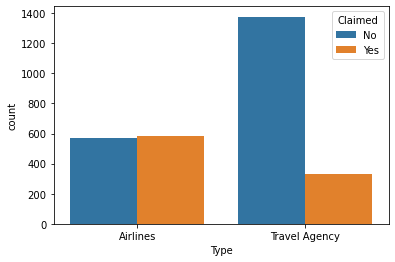

In [77]:
sns.countplot(firm_df['Type'], hue  = firm_df['Claimed'])
print('Percentage wise tabulation of Type of Tour firm as per insurance claim status :')
print(round(pd.crosstab(index = firm_df['Claimed'], columns = firm_df['Type']).apply(lambda x: x*100/x.sum()),2))
print('Countplot of Type Variable according to insurance claim status :')

Percentage wise tabulation of Destination as per insurance claim status :
Destination   ASIA  Americas  EUROPE
Claimed                             
No           67.17     72.41   71.16
Yes          32.83     27.59   28.84
Countplot of Destination Variable according to insurance claim status :


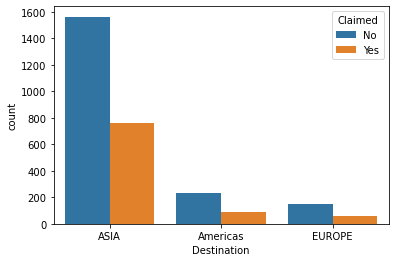

In [78]:
sns.countplot(firm_df['Destination'], hue  = firm_df['Claimed'])
print('Percentage wise tabulation of Destination as per insurance claim status :')
print(round(pd.crosstab(index = firm_df['Claimed'], columns = firm_df['Destination']).apply(lambda x: x*100/x.sum()),2))
print('Countplot of Destination Variable according to insurance claim status :')

Percentage wise tabulation of different Agencies as per insurance claim status :
Agency_Code    C2B    CWT    EPX    JZI
Claimed                                
No           39.54  70.28  84.49  87.45
Yes          60.46  29.72  15.51  12.55
Countplot of Agency_Code Variable according to insurance claim status :


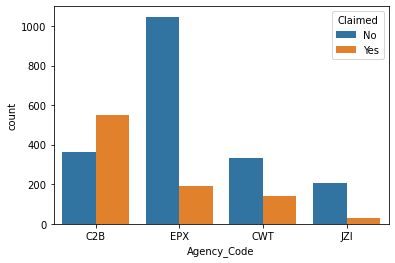

In [79]:
sns.countplot(firm_df['Agency_Code'], hue  = firm_df['Claimed'])
print('Percentage wise tabulation of different Agencies as per insurance claim status :')
print(round(pd.crosstab(index = firm_df['Claimed'], columns = firm_df['Agency_Code']).apply(lambda x: x*100/x.sum()),2))
print('Countplot of Agency_Code Variable according to insurance claim status :')

**Observation**:
* **'Destination'** : In all the different Destinations the percentage of people who claimed insurance is lower than people who didn't.
* **Product Name** : In Bronze and Customized plan the percentage of insurance claims are less. In the Cancellation plan the percentage of insurance claims is least. But in Gold and Silver plan the percentage of insurance claims is much higher.
* **Channel** : Both in online and offline channels he percentage of people who claimed insurance is lower than people who didn't.
* **Type** : For 'Travel Agency' type tour firms the insurance claims are much less. But for 'Airlines' type tour firms percentage of people who claim insurance and who don't claim are nearly equal.
* **Agency_Code** : For the tour agencies with Agency code 'CWT', 'EPX' and 'JZI', the percentage of people who claimed insurance is lesser than people who didn't. But for 'C2B' the percentage of people claimed insurance is much higher than who didn't.

### Bivariate Analysis


In [80]:
corr = df_num.corr(method='pearson')
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027457,0.036187
Commision,0.064759,1.000000,0.462114,0.762181
Duration,0.027457,0.462114,1.000000,0.549889
Sales,0.036187,0.762181,0.549889,1.000000


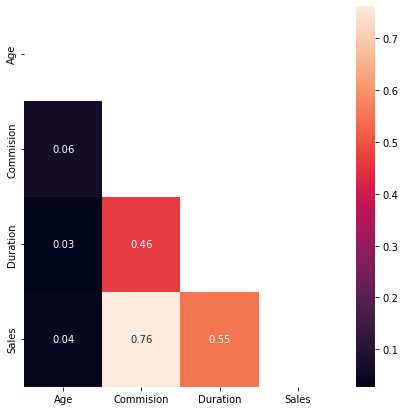

In [81]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(7, 7))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### Multivariate Analysis:

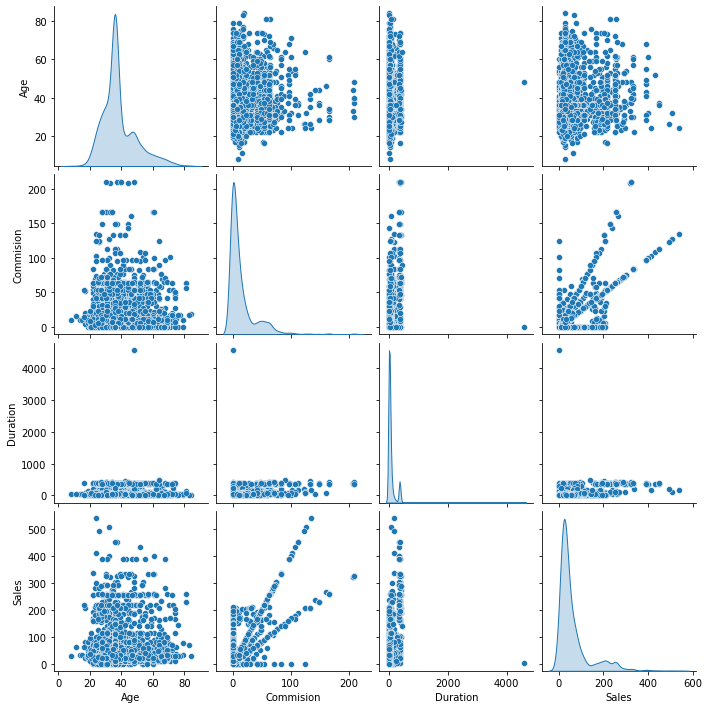

In [82]:
sns.pairplot(df_num,diag_kind="kde");
plt.show() 

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [83]:
for feature in firm_df.columns: 
    if firm_df[feature].dtype == 'object': 
        firm_df[feature] = pd.Categorical(firm_df[feature]).codes

In [84]:
df_dm = firm_df.copy()

In [85]:
x = df_dm.drop("Claimed" , axis=1)
y = df_dm.pop("Claimed")

In [86]:
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [87]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1300,69,0,0,6.00,1,7,15.0,0,0
2332,36,2,1,0.00,1,29,35.0,2,0
900,60,1,1,41.58,1,8,69.3,2,1
207,36,0,0,9.75,1,70,39.0,4,0
2310,36,2,1,0.00,1,39,51.0,1,2


In [88]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
642,31,1,1,0.00,0,402,97.0,2,0
219,68,2,1,0.00,1,60,29.0,1,0
1685,42,0,0,21.00,1,11,84.0,4,0
962,44,1,1,23.76,1,51,39.6,2,0
800,50,1,1,35.64,1,111,59.4,2,0


In [89]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### Building a DECISION TREE CLASSIFIER or  CLASSIFICATION AND REGRESSION TREE (CART)


In [90]:
dt_model = DecisionTreeClassifier(criterion = 'gini' , random_state=1 )

In [91]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [92]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('firm_cart.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [93]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid_dtcl = {
'criterion': ['gini'],
'max_depth': [10],
'min_samples_leaf': [50],
'min_samples_split': [450],
}


dt_model = DecisionTreeClassifier(criterion = 'gini' , random_state=1 )
grid_search_dtcl = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10)

In [95]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [96]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.000000
Agency_Code   0.619073
Type          0.000000
Commision     0.015189
Channel       0.000000
Duration      0.002489
Sales         0.314424
Product Name  0.048825
Destination   0.000000


In [97]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('firm_cart_final.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [98]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)

**Model Evaluation Cart**

In [99]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [100]:
import matplotlib.pyplot as plt

cart test AUC: 0.796


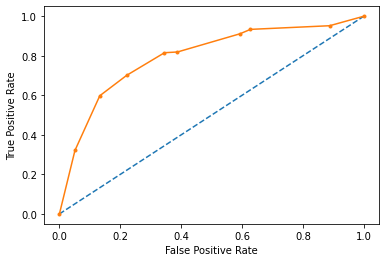

In [101]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('cart test AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

cart train AUC: 0.803


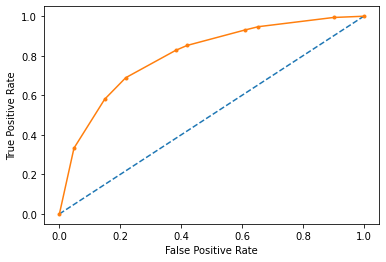

In [102]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('cart train AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [105]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



**Training Data Metrics**


In [106]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


In [107]:
#extracting true_positives, false_positives, true_negatives, false_negatives
cart_train_tn, cart_train_fp, cart_train_fn, cart_train_tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("Cart Train True Negatives: ",cart_train_tn)
print("Cart Train False Positives: ",cart_train_fp)
print("Cart Train False Negatives: ",cart_train_fn)
print("Cart Train True Positives: ",cart_train_tp)

Cart Train True Negatives:  1157
Cart Train False Positives:  202
Cart Train False Negatives:  270
Cart Train True Positives:  373


In [108]:
print('cart_accuracy', ((1157+373)/(1157+373)))
print('cart_Sensitivity',((373/373))) #TP/Actual yes
print('cart_Specificity',(1157/1157)) #TN/Actual no
print('cart_Precision',(373/373)) #TP/Predicted yes

cart_accuracy 1.0
cart_Sensitivity 1.0
cart_Specificity 1.0
cart_Precision 1.0


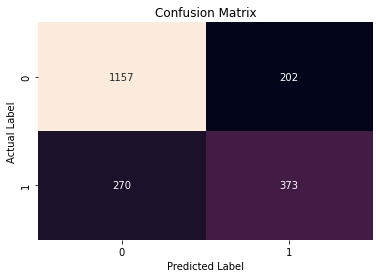

In [109]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [110]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
print("Accuracy of Training Dataset: ",np.round(cart_train_acc,3))

Accuracy of Training Dataset:  0.764


In [111]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

**Testing Dataset Metrics**


In [112]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


In [113]:
#extracting true_positives, false_positives, true_negatives, false_negatives
cart_test_tn, cart_test_fp, cart_test_fn, cart_test_tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("Cart Test True Negatives: ",cart_test_tn)
print("Cart False Test Positives: ",cart_test_fp)
print("Cart False Test Negatives: ",cart_test_fn)
print("Cart True Test Positives: ",cart_test_tp)

Cart Test True Negatives:  510
Cart False Test Positives:  78
Cart False Test Negatives:  109
Cart True Test Positives:  162


In [114]:
#extracting Accuracy,Sensitivity,Specificity,Precision on Test data
print('Accuracy', ((510+162)/(510+109+162+78)))
print('Sensitivity',((162/(162+109)))) 
print('Specificity',(510/(510+78)))
print('Precision',(162/(162+78)))

Accuracy 0.7823050058207218
Sensitivity 0.5977859778597786
Specificity 0.8673469387755102
Precision 0.675


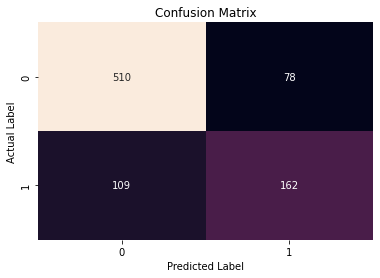

In [115]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [116]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
print("Accuracy of Testing Data: ",np.round(cart_test_acc,3))

Accuracy of Testing Data:  0.782


### Random Forest Model Performance Evaluation on Training data


In [117]:
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

0.7327672327672328
0.7297702297702298
0.7282717282717283


In [118]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,10,15],
    'max_features': [4, 5,6,7],
    'min_samples_leaf': [10,50, 70],
    'min_samples_split': [30, 50,70,450],
    'n_estimators': [150]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [120]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [10, 50, 70],
                         'min_samples_split': [30, 50, 70, 450],
                         'n_estimators': [150]})

In [121]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=150, random_state=1)

In [122]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

**Model Evaluation Random Forest**

In [123]:
from sklearn.metrics import confusion_matrix,classification_report

In [124]:
confusion_matrix(test_labels,ytest_predict)


array([[525,  63],
       [119, 152]], dtype=int64)

In [125]:
confusion_matrix(train_labels,ytrain_predict)


array([[1229,  130],
       [ 258,  385]], dtype=int64)

In [126]:
rf_train_tn, rf_train_fp, rf_train_fn, rf_train_tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("RF Train True Negatives: ",rf_train_tn)
print("RF Train False Positives: ",rf_train_fp)
print("RF Train False Negatives: ",rf_train_fn)
print("RF Train True Positives: ",rf_train_tp)

RF Train True Negatives:  1229
RF Train False Positives:  130
RF Train False Negatives:  258
RF Train True Positives:  385


In [127]:
rf_test_tn, rf_test_fp, rf_test_fn, rf_test_tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("RF Test True Negatives: ",rf_test_tn)
print("RF Test False Positives: ",rf_test_fp)
print("RF Test False Negatives: ",rf_test_fn)
print("RF Test True Positives: ",rf_test_tp)

RF Test True Negatives:  525
RF Test False Positives:  63
RF Test False Negatives:  119
RF Test True Positives:  152


In [128]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.71      0.56      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [129]:
print(classification_report(train_labels,ytrain_predict))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.75      0.60      0.66       643

    accuracy                           0.81      2002
   macro avg       0.79      0.75      0.76      2002
weighted avg       0.80      0.81      0.80      2002



In [130]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_,
columns = ["Imp"],
index = X_train.columns).sort_values('Imp',ascending=False
))

                   Imp
Agency_Code   0.252259
Sales         0.207481
Product Name  0.179632
Commision     0.126912
Duration      0.112591
Age           0.076571
Type          0.027728
Destination   0.015568
Channel       0.001257


In [131]:
#Train data Accuracy
rf_train_acc=best_grid.score(X_train,train_labels) 
print("Accuracy of Training Dataset: ",np.round(rf_train_acc,3))

Accuracy of Training Dataset:  0.806


**Test Data Metrics**

In [132]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.71
rf_test_recall  0.56
rf_test_f1  0.63


In [133]:
rf_test_acc=best_grid.score(X_test,test_labels)
print("Accuracy of Testing Data: ",np.round(rf_test_acc,3))

Accuracy of Testing Data:  0.788


rf test AUC: 0.818


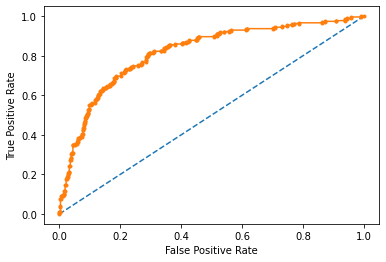

In [134]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_auc = roc_auc_score(test_labels, probs)
print('rf test AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

**Train Data Metrics**

In [135]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.75
rf_train_recall  0.6
rf_train_f1  0.66


rf train AUC: 0.871


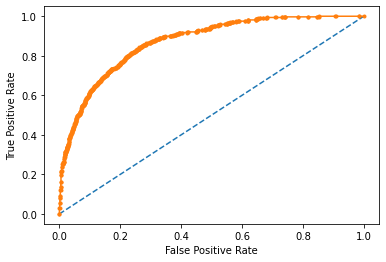

In [136]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_auc = roc_auc_score(train_labels, probs)
print('rf train AUC: %.3f' % rf_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

### Artificial Neural Network Model (ANN)


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [138]:
x_test = sc.transform(x_test)
x_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [139]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)

In [140]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.72896179
Iteration 2, loss = 0.70593218
Iteration 3, loss = 0.67784453
Iteration 4, loss = 0.65545352
Iteration 5, loss = 0.63764756
Iteration 6, loss = 0.62198249
Iteration 7, loss = 0.60700593
Iteration 8, loss = 0.59453642
Iteration 9, loss = 0.58487686
Iteration 10, loss = 0.57820536
Iteration 11, loss = 0.57181190
Iteration 12, loss = 0.56566198
Iteration 13, loss = 0.56039489
Iteration 14, loss = 0.55590465
Iteration 15, loss = 0.55265118
Iteration 16, loss = 0.54951657
Iteration 17, loss = 0.54664611
Iteration 18, loss = 0.54380193
Iteration 19, loss = 0.54086463
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


**Model Evaluation(ANN)**

In [141]:
from sklearn.metrics import confusion_matrix,classification_report

In [142]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[553,  35],
       [181,  90]], dtype=int64)

In [143]:
ann_test_acc=best_grid.score(x_test,test_labels)
print("Accuracy of Testing Dataset: %.3f" % ann_test_acc)

Accuracy of Testing Dataset: 0.685


In [144]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[1279,   80],
       [ 445,  198]], dtype=int64)

In [145]:
ann_train_acc=best_grid.score(x_train,train_labels) 
print("Accuracy of Training Data: %.3f" % ann_train_acc)

Accuracy of Training Data: 0.679


In [146]:
ann_test_tn, ann_test_fp, ann_test_fn,ann_test_tp = confusion_matrix(y_test, y_pred).ravel()
print("ANN Test True Negatives: ",ann_test_tn)
print("ANN Test False Positives: ",ann_test_fp)
print("ANN Test False Negatives: ",ann_test_fn)
print("ANN Test True Positives: ",ann_test_tp)

ANN Test True Negatives:  553
ANN Test False Positives:  35
ANN Test False Negatives:  181
ANN Test True Positives:  90


In [147]:
ann_train_tn, ann_train_fp, ann_train_fn,ann_train_tp = confusion_matrix(y_train,pred2).ravel()
print("ANN Train True Negatives: ",ann_train_tn)
print("ANN Train False Positives: ",ann_train_fp)
print("ANN Train False Negatives: ",ann_train_fn)
print("ANN Train True Positives: ",ann_train_tp)

ANN Train True Negatives:  1279
ANN Train False Positives:  80
ANN Train False Negatives:  445
ANN Train True Positives:  198


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       588
           1       0.72      0.33      0.45       271

    accuracy                           0.75       859
   macro avg       0.74      0.64      0.65       859
weighted avg       0.74      0.75      0.72       859



In [149]:
print('Classification Report Training Data:',classification_report(y_train, pred2))


Classification Report Training Data:               precision    recall  f1-score   support

           0       0.74      0.94      0.83      1359
           1       0.71      0.31      0.43       643

    accuracy                           0.74      2002
   macro avg       0.73      0.62      0.63      2002
weighted avg       0.73      0.74      0.70      2002



**Training Data Metrics**

In [150]:
ann_metrics=classification_report(y_train, pred2,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.71
ann_train_recall  0.31
ann_train_f1  0.43


In [151]:
import matplotlib.pyplot as plt

ANN train AUC: 0.768


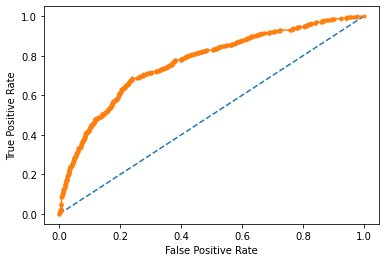

In [152]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ann_train_auc = roc_auc_score(y_train, probs)
print('ANN train AUC: %.3f' % ann_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

**Testing Data Metrics**


In [153]:
ann_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.72
ann_test_recall  0.33
ann_test_f1  0.45


ANN test AUC: 0.780


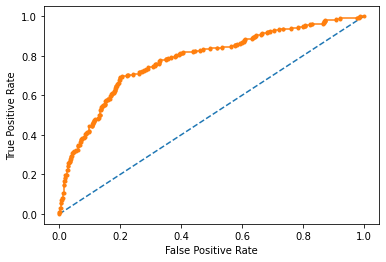

In [154]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ann_test_auc = roc_auc_score(y_test, probs)
print('ANN test AUC: %.3f' % ann_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

In [155]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Cart Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'Cart Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,Cart Train,Cart Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.81,0.79,0.68,0.68
AUC,0.80,0.80,0.87,0.82,0.77,0.78
Recall,0.58,0.60,0.60,0.56,0.31,0.33
Precision,0.65,0.68,0.75,0.71,0.71,0.72
F1 Score,0.61,0.63,0.66,0.63,0.43,0.45


**====================================================================================================================**